## 6. 피마 인디언 당뇨병 예측

https://www.kaggle.com/uciml/pima-indians-diabetes-database  
`diabetes.csv` 파일로 실습 진행을 밝힘  
  
`Pregnancies` :  임신 횟수  
`Glucose` : 포도당 부하 검사 수치  
`BloodPressure` : 혈압(mm Hg)  
`SkinThickness` : 팔 삼두근 뒤쪽의 피하지방 측정값(mm)  
`Insulin` : 혈청 인슐린(mu U/ml)  
`BMI` : 체질량지수(체중(kg)/(키(m)^2)  
`DiabetesPedigreeFunction` : 당뇨 내력 가중치 값  
`Age` : 나이  
`Outcome` : 클래스 결정 값 (0 or 1)

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

diabetes = pd.read_csv('data_set/diabetes.csv')
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [8]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


### 예측모델 생성

In [11]:
# 수정된 get_clf_eval() 함수 
def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test,pred)
    roc_auc = roc_auc_score(y_test, pred_proba)
    
    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},\
    F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

In [12]:
def precision_recall_curve_plot(y_test=None, pred_proba_c1=None):
    # threshold ndarray와 이 threshold에 따른 정밀도, 재현율 ndarray 추출. 
    precisions, recalls, thresholds = precision_recall_curve( y_test, pred_proba_c1)
    
    # X축을 threshold값으로, Y축은 정밀도, 재현율 값으로 각각 Plot 수행. 정밀도는 점선으로 표시
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary],label='recall')
    
    # threshold 값 X 축의 Scale을 0.1 단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    
    # x축, y축 label과 legend, 그리고 grid 설정
    plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall value')
    plt.legend(); plt.grid()
    plt.show()

In [30]:
# 피처 데이터 셋 X, 레이블 데이터 셋 y 추출
# 마지막 컬럼인 'Outcome' 컬럽은 레이블 값이므로 y로 설정
X = diabetes.iloc[:,:-1]
y = diabetes.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 156, stratify = y)

# LogisticRegression로 학습, 예측 진행
lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
pred = lr_clf.predict(X_test)
pred_proba = lr_clf.predict_proba(X_test)[:,1]

get_clf_eval(y_test, pred, pred_proba)

오차 행렬
[[88 12]
 [23 31]]
정확도: 0.7727, 정밀도: 0.7209, 재현율: 0.5741,    F1: 0.6392, AUC:0.7919


C:\Users\jinho\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


전체 데이터의 약 65%가 Negative 이므로 `재현율`의 성능에 좀 더 초점을 맞춰보자

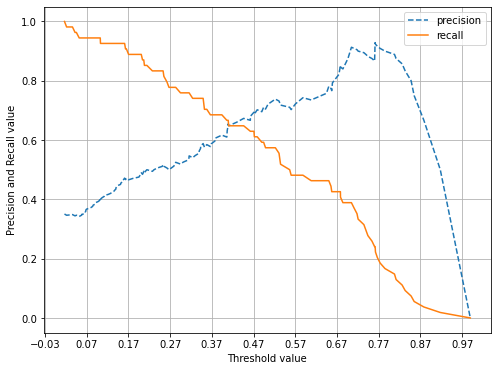

In [48]:
pred_proba_c1 = lr_clf.predict_proba(X_test)[:,1]
precision_recall_curve_plot(y_test, pred_proba)

**임계값을 0.42** 정도로 맞추면 재현율과 정밀도의 균형이 맞춰질 것으로 보이지만 그 둘의 수치가 **0.7**을 넘지 않으므로 데이터 값을 다시 점검해보자

Pregnancies : 임신 횟수
Glucose : 포도당 부하 검사 수치
BloodPressure : 혈압(mm Hg)
SkinThickness : 팔 삼두근 뒤쪽의 피하지방 측정값(mm)
Insulin : 혈청 인슐린(mu U/ml)
BMI : 체질량지수(체중(kg)/(키(m)^2)
DiabetesPedigreeFunction : 당뇨 내력 가중치 값
Age : 나이
Outcome : 클래스 결정 값 (0 or 1)

In [49]:
diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


min() = 0 인 값이 많다.  
예를 들어 `BloodPressure` 컬럼 값은 혈압 컬럶인데 값이 0인 것은 말이 안된다고 판단

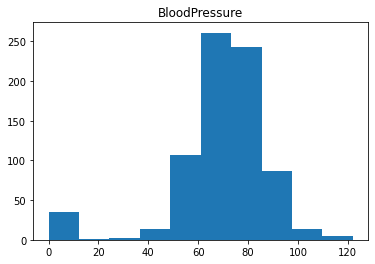

In [53]:
plt.hist(diabetes.BloodPressure, bins = 10)
plt.title('BloodPressure')
plt.show()

-> 히스토그램을 통해 수치가 이상한 컬럼을 판단하여 따로 확인  
-> 0 값이 전체 데이터 중 얼마나 차지하는지 비율 확인

In [90]:
# 검사 피쳐 설정
zero_features = ['Glucose', 'BloodPressure','SkinThickness','Insulin','BMI']

# 전체 데이터 건수
total_count = diabetes.BMI.count()

# 피처별로 반복하면서 각 컬럼 당 0의 값이 차지하는 비율 확인 및 퍼센트 계산
for i in zero_features:
    zero_count = diabetes[diabetes[i]==0][i].count()
    print('{0} 0 건수는 {1}, 퍼센트는 {2:.2f} %'.format(i, zero_count, 100*zero_count/total_count))

Glucose 0 건수는 5, 퍼센트는 0.65 %
BloodPressure 0 건수는 35, 퍼센트는 4.56 %
SkinThickness 0 건수는 227, 퍼센트는 29.56 %
Insulin 0 건수는 374, 퍼센트는 48.70 %
BMI 0 건수는 11, 퍼센트는 1.43 %


`SkinThickness` 와 `Insulin`컬럼의 0이 차지하는 비율은 높으므로 해당 데이터를 삭제하는 것은 옳지 않다고 판단.  
  

실습의 원활함을 위해 평균값으로 대체

In [91]:
# zero_features 리스트 내부에 저장된 개별 피처들에 대해서 0값을 평균 값으로 대체
diabetes[zero_features] = diabetes[zero_features].replace(0, diabetes[zero_features].mean())

0 값을 평균값으로 대체한 데이터 세트에 피처 스케일링을 적용해 변환

In [101]:
X = diabetes.iloc[:,:-1]
y = diabetes.iloc[:,-1]

# StandardScaler 클래스를 적용해 피처 데이터 세트에 일괄적으로 스케일링
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 156, stratify = y)

# LogisticRegression 으로 학습, 예측 , 평가 진행
lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
pred = lr_clf.predict(X_test)
pred_proba = lr_clf.predict_proba(X_test)[:,-1]

get_clf_eval(y_test, pred, pred_proba)

오차 행렬
[[89 11]
 [19 35]]
정확도: 0.8052, 정밀도: 0.7609, 재현율: 0.6481,    F1: 0.7000, AUC:0.8406


C:\Users\jinho\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


스케일링 전보다 성능 수치가 일정 수준 향상되었다.  
  

하지만 재현율 수치는 여전히 높지 않은 수치를 보인다.  
  
-> 결정 임계값을 달리하여 각 임계값 별 재현율 수치를 파악해보자


In [108]:
from sklearn.preprocessing import Binarizer

def get_eval_by_threshold(y_test, pred_proba_c1, thresholds):
    # thresholds 리스트 객체내의 값을 차례로 iteratoin 하면서 Evaluaion 수행
    for custom_threshold in thresholds:
        binarizer = Binarizer(threshold = custom_threshold).fit(pred_proba_c1)
        custom_predict = binarizer.transform(pred_proba_c1)
        print('임곗값:',custom_threshold)
        get_clf_eval(y_test , custom_predict, pred_proba_c1)
        print('')

In [109]:
thresholds = [0.3 , 0.33 ,0.36,0.39, 0.42 , 0.45 ,0.48, 0.50]
pred_proba = lr_clf.predict_proba(X_test)
get_eval_by_threshold(y_test, pred_proba[:,1].reshape(-1,1), thresholds )

임곗값: 0.3
오차 행렬
[[68 32]
 [10 44]]
정확도: 0.7273, 정밀도: 0.5789, 재현율: 0.8148,    F1: 0.6769, AUC:0.8406

임곗값: 0.33
오차 행렬
[[73 27]
 [12 42]]
정확도: 0.7468, 정밀도: 0.6087, 재현율: 0.7778,    F1: 0.6829, AUC:0.8406

임곗값: 0.36
오차 행렬
[[75 25]
 [15 39]]
정확도: 0.7403, 정밀도: 0.6094, 재현율: 0.7222,    F1: 0.6610, AUC:0.8406

임곗값: 0.39
오차 행렬
[[75 25]
 [16 38]]
정확도: 0.7338, 정밀도: 0.6032, 재현율: 0.7037,    F1: 0.6496, AUC:0.8406

임곗값: 0.42
오차 행렬
[[80 20]
 [16 38]]
정확도: 0.7662, 정밀도: 0.6552, 재현율: 0.7037,    F1: 0.6786, AUC:0.8406

임곗값: 0.45
오차 행렬
[[84 16]
 [18 36]]
정확도: 0.7792, 정밀도: 0.6923, 재현율: 0.6667,    F1: 0.6792, AUC:0.8406

임곗값: 0.48
오차 행렬
[[85 15]
 [19 35]]
정확도: 0.7792, 정밀도: 0.7000, 재현율: 0.6481,    F1: 0.6731, AUC:0.8406

임곗값: 0.5
오차 행렬
[[89 11]
 [19 35]]
정확도: 0.8052, 정밀도: 0.7609, 재현율: 0.6481,    F1: 0.7000, AUC:0.8406



임계값이 0.5일때 어느정도 전체적인 성능 평가 지표를 유지한다.

***

지금까지 분류에 사용되는 정확도, 오차 행렬, 정밀도, 재현율, F1 스코어, ROC-AUC와 같은 성능 지표를 살펴보았다.  
  
이진 분류의 레이블 값이 불균형하게 분포될 경우 단순히 예측 결과와 실제 경과가 일치하는 지표인 정확도만으로는 ML 모델의 예측 성능을 평가할 수 없다.  
***

`오차 행렬`은 Negative와 Positive 값을 가지는 실제 클래스 값과 예측 클래스 값이 True와 False에 따라 TN, TP, FN, FP로 매핑되는 4분위 행렬을 기반으로 예측 성능을 평가한다  
  
`정확도 / 정밀도 / 재현율`은 TN, TP, FN, FP 값을 다양하게 결합해 만들어지며, 이를 분류 모델 예측 성능의 오류가 어떠한 모습으로 발생하는지 알 수 있다  
  
`정밀도와 재현율`은 Positive 데이터 세트의 예측 성능에 좀 더 초점을 둔 평가 지표이다. 분류의 결정 임계값을 조정해 정밀도 or 재현율 수치를 높일 수 있다.  
  
`F1 스코어`는 정밀도와 재현율 수치를 결합한 지표이며 어느 한쪽으로 치우지지 않을 떄 높은 수치를 가진다.  
  
`ROC-AUC`는 일반적으로 이진 분류의 성능 평가를 위해 가장 많이 사용되는 지표이다.  
AUC는 ROC 곡선 밑의 면적을 구한 것으로 1에 가까울수록 좋은 수치이다.